## Extracting all Images 

### Import all libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2

### The Dataset

#### MNIST Digit Recognition 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

https://www.kaggle.com/c/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

### Read the images and labels

In [3]:
data_file = '/content/drive/MyDrive/NLP/DLandNLP/ComputerVision/mnist.csv'

In [4]:
digits_df = pd.read_csv(data_file)

In [5]:
digits_df.head( 11)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
digits_df.shape

(42000, 785)

In [7]:
digits_df.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

### For reading into numpy arrays

In [8]:
labels = digits_df.iloc[0:,0].astype(np.int32)
image_buffer = digits_df.iloc[0:,1:].values
labels_np = np.array( labels )

In [9]:
labels_np[0:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3], dtype=int32)

In [10]:
image_buffer[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
image_buffer.shape

(42000, 784)

In [12]:
dataset = zip(labels, image_buffer)

The images are 28 x 28 pixel images

### Verifying images

In [13]:
def print_image( idx ):
    plt.imshow( image_buffer[idx].reshape(28, 28));
    print( labels_np[idx] )

8


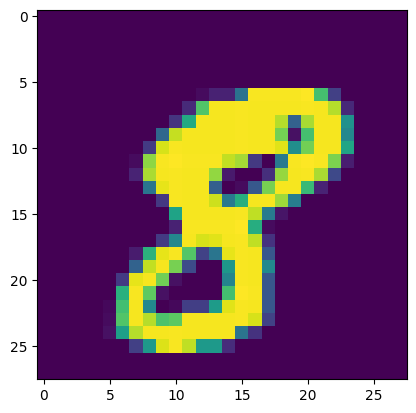

In [14]:
print_image( 10 )

### How images actually look like?

In [15]:
np.set_printoptions(precision=4, linewidth=120)

In [16]:
image_buffer[8].reshape(28, 28)[5:28, 5:25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  41, 149, 156, 179, 254, 254, 201, 119,  46,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  13, 147, 241, 253, 253, 254, 253, 253, 253, 253, 245, 160,   0,   0],
       [  0,   0,   0,   0,   0,  31, 224, 253, 253, 180, 174, 175, 174, 174, 174, 174, 223, 247, 145,   6],
       [  0,   0,   0,   0,   7, 197, 254, 253, 165,   2,   0,   0,   0,   0,   0,   0,  12, 102, 184,  16],
       [  0,   0,   0,   0, 152, 253, 254, 162,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 235, 254, 158,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  74, 250, 253,  15,   0,   0,   0,  16,  20,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   7, 199, 253, 253,   0,   0,  25, 130, 235, 254, 247, 145,   6,   0,   0,   0,   0,   0],
       [  0,   0,  20, 253, 253, 177, 100, 219, 240, 253, 253, 254, 253, 253, 125,   0,   0,   0,   0,   0],
       [  0,   0,  

### Checking shape of the image file

In [17]:
image_buffer.shape

(42000, 784)

### Reshaping all images

In [18]:
reshaped_images = np.array([x.reshape( 28, 28) for x in image_buffer])

In [19]:
reshaped_images.shape

(42000, 28, 28)

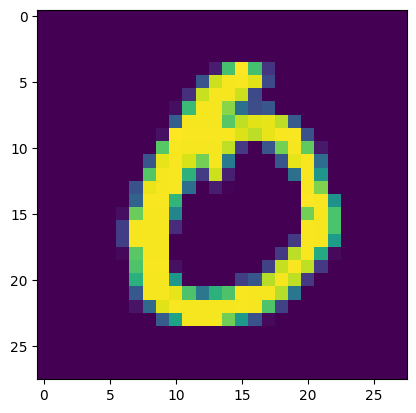

In [20]:
plt.imshow(reshaped_images[200]);

## Classifying Digits

### Importing all required libraries

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


### Set X and Y

In [23]:
X = reshaped_images

In [24]:
y = keras.utils.to_categorical( labels_np )

In [25]:
y[0:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Splitting datasets into train and test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42 )

In [28]:
X_train.shape

(33600, 28, 28)

In [29]:
X_test.shape

(8400, 28, 28)

In [30]:
y_train.shape

(33600, 10)

In [31]:
y_test.shape

(8400, 10)

In [32]:
input_shape = X_train.shape[-2:]

In [33]:
print(input_shape)

(28, 28)


In [34]:
X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

### Train a model

In [36]:
# import necessary building blocks
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [41]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(Dense(10, activation = 'softmax'))
# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = True

94765736/94765736 [==============================] - 0s 0us/step


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [43]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
X_train.shape

(33600, 28, 28, 3)

In [45]:
model.fit(X_train,
          y_train,
          batch_size = 32,
          epochs = 3,
          validation_data = (X_test, y_test))

Epoch 1/3
1050/1050 [==============================] - 96s 45ms/step - loss: 0.4624 - accuracy: 0.9010 - val_loss: 0.1423 - val_accuracy: 0.9564
Epoch 2/3
1050/1050 [==============================] - 44s 42ms/step - loss: 0.2792 - accuracy: 0.9360 - val_loss: 0.1091 - val_accuracy: 0.9698
Epoch 3/3
1050/1050 [==============================] - 44s 42ms/step - loss: 0.1495 - accuracy: 0.9672 - val_loss: 0.0758 - val_accuracy: 0.9785


### Confusion Matrix

In [46]:
np_label_list = list(np.unique(labels_np))

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
predictions = model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)

263/263 [==============================] - 3s 9ms/step


In [49]:
y_actual_classes = np.argmax(y_test, axis=1)

In [50]:
y_pred_classes

array([8, 1, 9, ..., 3, 0, 9])

In [51]:
y_actual_classes

array([8, 1, 9, ..., 3, 0, 9])

In [52]:
confusion_matrix(y_actual_classes, y_pred_classes)

array([[805,   0,   0,   3,   0,   1,   1,   0,   0,   6],
       [  0, 899,   1,   2,   1,   0,   2,   4,   0,   0],
       [  1,   1, 826,  10,   2,   0,   0,   4,   1,   1],
       [  0,   0,   0, 932,   0,   1,   0,   2,   0,   2],
       [  0,   1,   0,   0, 830,   0,   1,   1,   0,   6],
       [  0,   1,   0,   7,   0, 688,   1,   1,   0,   4],
       [  4,   0,   0,   0,   1,  11, 767,   0,   2,   0],
       [  0,   0,   1,   3,   4,   0,   0, 876,   0,   9],
       [  3,   1,   8,  28,   3,   5,   0,   2, 770,  15],
       [  0,   0,   0,   3,   7,   1,   0,   1,   0, 826]])

In [53]:
import seaborn as sn

In [54]:
def plot_confustion_matrix(y_test, y_pred):
    plt.figure(figsize=(10, 8))
    plt.title('Confusion matrix', fontsize=16)
    cm = confusion_matrix(y_test, y_pred, labels = np_label_list)
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = np_label_list, 
               yticklabels = np_label_list )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.show()

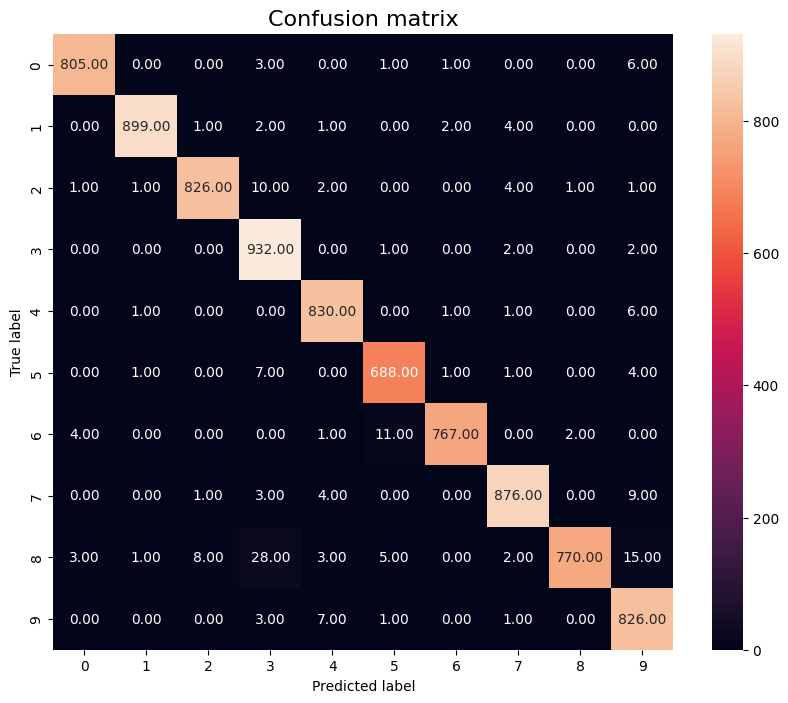

In [55]:
plot_confustion_matrix(y_actual_classes, y_pred_classes)

In [56]:
from sklearn.metrics import classification_report, accuracy_score

In [57]:
print(classification_report(y_actual_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       1.00      0.99      0.99       909
           2       0.99      0.98      0.98       846
           3       0.94      0.99      0.97       937
           4       0.98      0.99      0.98       839
           5       0.97      0.98      0.98       702
           6       0.99      0.98      0.99       785
           7       0.98      0.98      0.98       893
           8       1.00      0.92      0.96       835
           9       0.95      0.99      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [58]:
accuracy_score(y_actual_classes, y_pred_classes)

0.978452380952381